In [36]:
data = {"index": 0, 
"prediction": "This is a synthesized audio file to test your simultaneous speech, to speak to speech, to speak translation system.", 
"delays": [1500.0, 2000.0, 2500.0, 3000.0, 3500.0, 4000.0, 4500.0, 5000.0, 5500.0, 6000.0, 6500.0, 6849.886621315192, 6849.886621315192, 6849.886621315192, 6849.886621315192, 6849.886621315192, 6849.886621315192, 6849.886621315192, 6849.886621315192], 
"elapsed": [2099.637985229492, 2922.6977825164795, 3770.6520557403564, 4589.5750522613525, 5397.828102111816, 6218.169927597046, 7061.785936355591, 7919.31676864624, 8795.702934265137, 9650.867938995361, 10535.896062850952, 11255.411590416144, 11255.411590416144, 11255.411590416144, 11255.411590416144, 11255.411590416144, 11255.411590416144, 11255.411590416144, 11255.411590416144], 
"prediction_length": 19, 
"reference": "This is a synthesized audio file to test your simultaneous speech to text and to speech to speach translation system.", 
"source": ["test.wav", 
"samplerate: 22050 Hz", 
"channels: 1", 
"duration: 6.850 s", 
"format: WAV (Microsoft) [WAV]", 
"subtype: Signed 16 bit PCM [PCM_16]"], 
"source_length": 6849.886621315192}

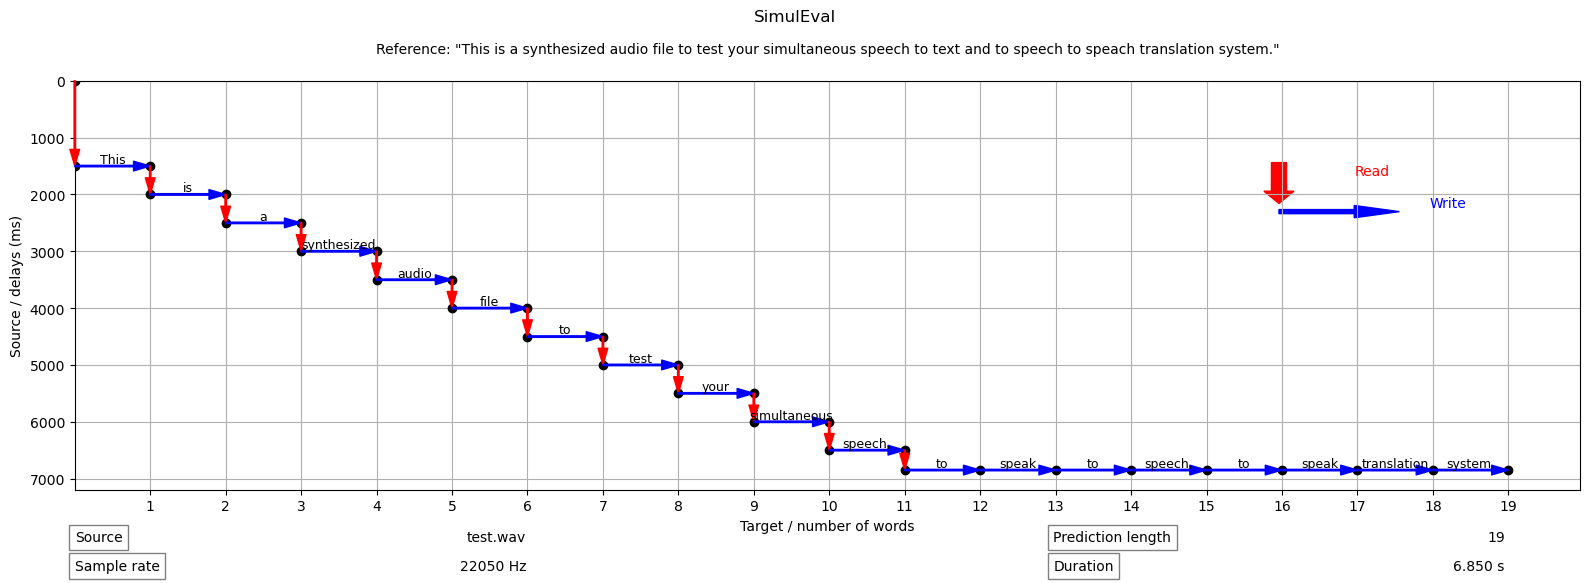

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

# Organize all data
words = np.arange(1, data.get("prediction_length", 0) + 1)
delays = data.get("delays", "N/A delays data")
data_points = [(words[i], delays[i]) for i in range(len(delays))]
data_points.insert(0, (0,0))
prediction_word_list = data.get("prediction", "N/A predition data").split(" ")

# Insert points to create the staircase effect
for i in range(0, len(data_points)+3, 2):
    data_points.insert(i+1, (data_points[i][0],data_points[i+1][1]))

# Create a new figure
plt.figure(figsize=(16, 6))

# Plot the points and connect them with lines
x, y = zip(*data_points)
plt.plot(list(x), list(y), marker='o', color='black')

# Draw arrows between points
blue_arrow_indices = []
for i in range(len(data_points) - 1):
    color = 'blue' if y[i] == y[i + 1] else 'red'
    if color == 'blue':
        blue_arrow_indices.append(i)
    plt.annotate(
        '',
        xy=(x[i + 1], y[i + 1]),
        xytext=(x[i], y[i]),
        arrowprops=dict(facecolor=color, edgecolor=color, shrink=0, width=1, headwidth=7)
    )

# Annotate blue arrows with words from prediction_word_list
for idx, word in zip(blue_arrow_indices, prediction_word_list):
    plt.text(
        (x[idx] + x[idx + 1]) / 2,  # x position of the annotation
        y[idx] + 0.1,  # y position of the annotation
        word,  # text to annotate
        ha='center',  # horizontal alignment
        va='bottom',  # vertical alignment
        fontsize=9,  # font size
        color='black'  # text color
    )

# Custom legend on the right side
legend_x = 0.8  # X-coordinate for the legend in axes coordinates
legend_y = 0.8  # Starting Y-coordinate for the legend

# Red downward arrow
red_arrow = patches.FancyArrow(legend_x, legend_y, 0, -0.07, width=0.01, head_width=0.02, head_length=0.03, color='red', transform=plt.gca().transAxes)
plt.gca().add_patch(red_arrow)
plt.text(legend_x + 0.05, legend_y - 0.03, 'Read', color='red', transform=plt.gca().transAxes)

# Blue rightward arrow
blue_arrow = patches.FancyArrow(legend_x, legend_y - 0.12, 0.05, 0, width=0.01, head_width=0.03, head_length=0.03, color='blue', transform=plt.gca().transAxes)
plt.gca().add_patch(blue_arrow)
plt.text(legend_x + 0.1, legend_y - 0.11, 'Write', color='blue', transform=plt.gca().transAxes)

# Flip the y-axis
plt.gca().invert_yaxis()
# Set the limits of the axes to start at (0,0)
plt.gca().set_xlim(left=0)
plt.gca().set_ylim(top=0)

# Set the grid
plt.grid(True)

# Add labels and title
plt.xlabel('Target / number of words')
plt.ylabel('Source / delays (ms)')
plt.suptitle('SimulEval')
reference = data.get("reference", "N/A reference data")
subtitle = f"Reference: \"{reference}\""
plt.gca().set_title(subtitle, fontsize=10, pad=20)
plt.gca().set_xticks(words)

# Additional text at the bottom
additional_text = [
    ("Source", data.get("source", "N/A source data")[0]),
    ("Prediction length", data.get("prediction_length", "N/A prediction length")),
    ("Sample rate", data.get("source", "N/A source data")[1].split(":")[1].strip()),
    ("Duration", data.get("source", "N/A source data")[3].split(":")[1].strip())
    ]
start_y = -0.1
line_space = 0.07
for i in range(len(additional_text)):
    if(i % 2 == 0):
        plt.gca().text(0, start_y, additional_text[i][0], ha='left', va='top', transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
        plt.gca().text(0.3, start_y, additional_text[i][1], ha='right', va='top', transform=plt.gca().transAxes, fontsize=10)
    else:
        plt.gca().text(0.65, start_y, additional_text[i][0], ha='left', va='top', transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
        plt.gca().text(0.95, start_y, additional_text[i][1], ha='right', va='top', transform=plt.gca().transAxes, fontsize=10)
        start_y -= line_space
    
# Adjust layout to make room for the bottom text
plt.tight_layout()

# Show the plot
plt.show()